# Part I - Airline On-Time Performance
## Lyn Ndunge Nzioka

## Introduction
> The **Airline On-Time Performance dataset** is a publicly available dataset that contains flight arrival and departure details for all commercial flights within the USA from October 1987 to April 2008. The dataset is maintained by the US Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS).

> The dataset is quite large, with nearly 120 million records in total. It contains information about flight delays, cancellations, diversions, and on-time performance, as well as information about the carriers, airports, and routes involved. The data can be used to analyze various aspects of airline operations and performance, such as identifying factors that contribute to delays, predicting flight delays, and evaluating the performance of individual carriers and airports.
The dataset is used by researchers, data scientists, and analysts in a variety of industries, including aviation, transportation, and data analytics. 

> The airline on-time performance dataset contains information about the on-time performance of domestic flights in the United States from 1987 to 2008. The dataset has 29 columns, which are described below:<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **Year:** the year in which the flight took place (1987-2008) <br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **Month:** the month in which the flight took place (1-12) <br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **DayofMonth:** the day of the month on which the flight took place (1-31) <br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **DayOfWeek:** the day of the week on which the flight took place (1=Monday, 2=Tuesday, etc.) <br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **DepTime:** the actual departure time of the flight, in local time (HHMM) <br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **CRSDepTime:** the scheduled departure time of the flight, in local time (HHMM) <br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **ArrTime:** the actual arrival time of the flight, in local time (HHMM) <br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **CRSArrTime:** the scheduled arrival time of the flight, in local time (HHMM)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **UniqueCarrier:** the code of the airline operating the flight <br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **FlightNum:** the flight number<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **TailNum:** the tail number of the aircraft<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **ActualElapsedTime:** the actual elapsed time of the flight, in minutes<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **CRSElapsedTime:** the scheduled elapsed time of the flight, in minutes<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **ArrDelay:** the difference in minutes between the scheduled arrival and the actual arrival time<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **DepDelay:** the difference in minutes between the scheduled departure and the actual departure time<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **Origin:** the code of the airport where the flight originated<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **Dest:** the code of the airport where the flight terminated<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **Distance:** the distance traveled by the flight, in miles<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **TaxiIn:** the time the flight spent taxiing to the gate, in minutes<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **TaxiOut:** the time the flight spent taxiing from the gate, in minutes<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **Cancelled:** whether the flight was cancelled (1=yes, 0=no)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **CancellationCode:** the reason for the cancellation (A=carrier, B=weather, C=national air system, D=security)<br>
  &nbsp;&nbsp;&nbsp;&nbsp;  **Diverted:** whether the flight was diverted (1=yes, 0=no)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **CarrierDelay:** the amount of time the flight was delayed due to carrier issues, in minutes<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **WeatherDelay:** the amount of time the flight was delayed due to weather, in minutes<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **NASDelay:** the amount of time the flight was delayed due to national air system issues, in minutes<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **SecurityDelay:** the amount of time the flight was delayed due to security issues, in minutes<br>
   &nbsp;&nbsp;&nbsp;&nbsp;  **LateAircraftDelay:** the amount of time the flight was delayed due to the late arrival of the aircraft, in minutes<br>






## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loads the 2007 and 2008 airline on-time performance datasets, concatenates them
df_2007 = pd.read_csv('2007.csv', nrows=100000)
df_2008 = pd.read_csv('2008.csv', nrows=100000)


# concatenate the datasets
df = pd.concat([df_2007, df_2008], ignore_index=True)
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
153667,2008,1,19,6,1815.0,1815,1937.0,1940,WN,1553,...,2.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
76727,2007,1,26,5,701.0,705,813.0,800,WN,636,...,4.0,27.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
40001,2007,1,14,7,1035.0,1035,1400.0,1405,WN,572,...,5.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
5835,2007,1,3,3,NaN,730,NaN,730,WN,2003,...,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
92162,2007,1,31,3,1204.0,1155,1347.0,1355,WN,296,...,4.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               200000 non-null  int64  
 1   Month              200000 non-null  int64  
 2   DayofMonth         200000 non-null  int64  
 3   DayOfWeek          200000 non-null  int64  
 4   DepTime            196977 non-null  float64
 5   CRSDepTime         200000 non-null  int64  
 6   ArrTime            196641 non-null  float64
 7   CRSArrTime         200000 non-null  int64  
 8   UniqueCarrier      200000 non-null  object 
 9   FlightNum          200000 non-null  int64  
 10  TailNum            198858 non-null  object 
 11  ActualElapsedTime  196641 non-null  float64
 12  CRSElapsedTime     200000 non-null  int64  
 13  AirTime            196641 non-null  float64
 14  ArrDelay           196641 non-null  float64
 15  DepDelay           196977 non-null  float64
 16  Or

(200000, 29)

### What is the structure of your dataset?

> The structure of the airline on-time performance dataset can be described as follows:<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; There are **9842432 rows and 29 columns** in the dataset.<br>

### What is/are the main feature(s) of interest in your dataset?

> Based on the given dataset of airline on-time performance, some of the main features of interest could be:<br>
       &nbsp;&nbsp;&nbsp;**1. Flight delays and cancellations:** It could be interesting to analyze the frequency, duration and reasons for flight delays and cancellations.<br>
       &nbsp;&nbsp;&nbsp;**2. Airline performance:** Analyzing the performance of airlines in terms of on-time arrivals and departures, average delay times, etc.<br>
       &nbsp;&nbsp;&nbsp;**3. Time and seasonality:** Understanding how the time of day, day of the week, month or season impact flight delays and cancellations.<br>
       &nbsp;&nbsp;&nbsp;**4. Distance and routes:** Analyzing the relationship between distance of travel and flight performance, as well as the performance of different routes.<br>
        

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Here are some features that could be relevant for each group:<br>
    **Flight delays and cancellations:**<br>
        Actual and scheduled arrival and departure times<br>
        Flight cancellation codes<br>
        Weather-related indicators (e.g. visibility, precipitation)<br>
    **Airline performance:**<br>
        Airline name and carrier code<br>
        Flight numbers<br>
        Arrival and departure delay times<br>
        Flight distance<br>
    **Time and seasonality:**<br>
        Month, day of the week, and time of day<br>
        Season<br>
        Holiday indicators<br>
    **Distance and routes:**<br>
        Origin and destination airports<br>
        Flight distance<br>
        Flight time<br>

In [4]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2008,1,7,1,1603.0,1609,1840.0,1855,XE,7674,...,4.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
199996,2008,1,10,4,1627.0,1609,1907.0,1855,XE,7674,...,6.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
199997,2008,1,11,5,1622.0,1609,1907.0,1855,XE,7674,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
199998,2008,1,13,7,1606.0,1609,1905.0,1855,XE,7674,...,4.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               200000 non-null  int64  
 1   Month              200000 non-null  int64  
 2   DayofMonth         200000 non-null  int64  
 3   DayOfWeek          200000 non-null  int64  
 4   DepTime            196977 non-null  float64
 5   CRSDepTime         200000 non-null  int64  
 6   ArrTime            196641 non-null  float64
 7   CRSArrTime         200000 non-null  int64  
 8   UniqueCarrier      200000 non-null  object 
 9   FlightNum          200000 non-null  int64  
 10  TailNum            198858 non-null  object 
 11  ActualElapsedTime  196641 non-null  float64
 12  CRSElapsedTime     200000 non-null  int64  
 13  AirTime            196641 non-null  float64
 14  ArrDelay           196641 non-null  float64
 15  DepDelay           196977 non-null  float64
 16  Or

In [6]:
#drops unnecessary columns, drops rows with missing values, converts relevant columns to datetime and integer types, filters out flights with negative elapsed time, creates a new column for flight delay, filters out flights with negative or extreme delay times, creates new columns for 
#flight hour, flight season, and flight distance category, and saves the cleaned dataset to a new file called cleaned_data.csv
# create a new column called 'FlightDate'
df['FlightDate'] = pd.to_datetime(df[['Year', 'Month', 'DayofMonth']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
df['FlightDate'].sample(5)

177384   2008-01-27
44664    2007-01-16
172852   2008-01-25
153402   2008-01-19
32419    2007-01-12
Name: FlightDate, dtype: datetime64[ns]

In [7]:
# create a dictionary to map integer day of week values to their corresponding names
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

# use the map method to apply the dictionary to the DayOfWeek column and create a new column with the day names
df['DayOfWeek_Name'] = df['DayOfWeek'].map(day_names)

#df = df.drop('DayOfWeek', axis=1)
df['DayOfWeek_Name'].sample(5)

185467     Tuesday
80444     Saturday
160724      Monday
192205    Thursday
191549    Thursday
Name: DayOfWeek_Name, dtype: object

In [8]:
date_cols = ['DepTime', 'ArrTime', 'CRSDepTime', 'CRSArrTime']
time_format = '%H%M'

for col in date_cols:
    df[col] = pd.to_datetime(df[col], format=time_format, errors='coerce')
    df[col] = df[col].dt.strftime('%Y-%m-%d %H:%M:%S')
    df[col] = pd.to_datetime(df[col]).dt.time
df[['DepTime', 'ArrTime', 'CRSDepTime', 'CRSArrTime']].sample(5)

,DepTime,ArrTime,CRSDepTime,CRSArrTime
24994,07:19:00,08:32:00,07:20:00,08:45:00
25478,12:22:00,12:47:00,12:25:00,12:50:00
18019,08:52:00,09:16:00,08:55:00,09:20:00
21437,17:39:00,18:33:00,17:40:00,18:35:00
60995,21:24:00,22:46:00,20:55:00,22:15:00


In [9]:
# drop unnecessary columns
df = df.drop(['Year', 'DayOfWeek', 'Diverted'], axis=1)

# fill NaN values with 0
df = df.fillna(0)

In [10]:
df

,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiOut,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightDate,DayOfWeek_Name
0,1,1,12:32:00,12:25:00,13:41:00,13:40:00,WN,2891,N351,69.0,...,11.0,0,0,0.0,0.0,0.0,0.0,0.0,2007-01-01,Monday
1,1,1,19:18:00,19:05:00,20:43:00,20:35:00,WN,462,N370,85.0,...,6.0,0,0,0.0,0.0,0.0,0.0,0.0,2007-01-01,Monday
2,1,1,22:06:00,21:30:00,23:34:00,23:00:00,WN,1229,N685,88.0,...,9.0,0,0,3.0,0.0,0.0,0.0,31.0,2007-01-01,Monday
3,1,1,12:30:00,12:00:00,13:56:00,13:30:00,WN,1355,N364,86.0,...,8.0,0,0,23.0,0.0,0.0,0.0,3.0,2007-01-01,Monday
4,1,1,08:31:00,08:30:00,09:57:00,10:00:00,WN,2278,N480,86.0,...,9.0,0,0,0.0,0.0,0.0,0.0,0.0,2007-01-01,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,7,16:03:00,16:09:00,18:40:00,18:55:00,XE,7674,N11176,97.0,...,11.0,0,0,0.0,0.0,0.0,0.0,0.0,2008-01-07,Monday
199996,1,10,16:27:00,16:09:00,19:07:00,18:55:00,XE,7674,N11176,100.0,...,8.0,0,0,0.0,0.0,0.0,0.0,0.0,2008-01-10,Thursday
199997,1,11,16:22:00,16:09:00,19:07:00,18:55:00,XE,7674,N11181,105.0,...,10.0,0,0,0.0,0.0,0.0,0.0,0.0,2008-01-11,Friday
199998,1,13,16:06:00,16:09:00,19:05:00,18:55:00,XE,7674,N12167,119.0,...,15.0,0,0,0.0,0.0,0.0,0.0,0.0,2008-01-13,Sunday


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Month              200000 non-null  int64         
 1   DayofMonth         200000 non-null  int64         
 2   DepTime            200000 non-null  object        
 3   CRSDepTime         200000 non-null  object        
 4   ArrTime            200000 non-null  object        
 5   CRSArrTime         200000 non-null  object        
 6   UniqueCarrier      200000 non-null  object        
 7   FlightNum          200000 non-null  int64         
 8   TailNum            200000 non-null  object        
 9   ActualElapsedTime  200000 non-null  float64       
 10  CRSElapsedTime     200000 non-null  int64         
 11  AirTime            200000 non-null  float64       
 12  ArrDelay           200000 non-null  float64       
 13  DepDelay           200000 non-null  float64 

In [12]:
# save the cleaned dataset
df.to_csv('cleaned_data.csv', index=False)

## Data Exploration

### Questions to be answered
The key factors that were focused on in the analysis of the airline on-time performance dataset were **flight delays and cancellations, airline performance, time and seasonality, and distance and routes** .These factors were used to guide the development of relevant research questions and to determine which data was most important to collect and analyze in order to gain insights from the dataset.<br>

**Univariate Visualizations:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;What is the distribution of flight delays and cancellations?<br>
&nbsp;&nbsp;&nbsp;&nbsp;What is the average delay time for flights that were delayed?<br>
&nbsp;&nbsp;&nbsp;&nbsp;What are the most common reasons for flight delays and cancellations?<br>
&nbsp;&nbsp;&nbsp;&nbsp;What are the most commonly flown routes, and how do they compare in terms of on-time performance?<br>
**Bivariate Visualizations:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the average delay time vary by airline and airport?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the average delay time vary by airline and the reason for delay/cancellation?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the average delay time vary by route and the month of travel?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the number of flights vary by airline and the month of travel?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the distance of travel impact flight delays and cancellations?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the day of the week impact flight delays and cancellations?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How do different airlines compare in terms of on-time arrivals and departures?<br>
&nbsp;&nbsp;&nbsp;&nbsp;What is the distribution of average delay times for different airlines?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How do different airports compare in terms of on-time arrivals and departures?<br>
**Multivariate Visualizations:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the relationship between distance, airline, and departure/arrival time impact flight delays?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the relationship between distance, airline, and month of travel impact flight delays?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the relationship between origin airport, destination airport, and airline impact flight delays?<br>
&nbsp;&nbsp;&nbsp;&nbsp;How does the relationship between reason for delay/cancellation, airline, and time of day impact flight delays?<br>


#### Question_1:  What is the distribution of flight delays in minutes?

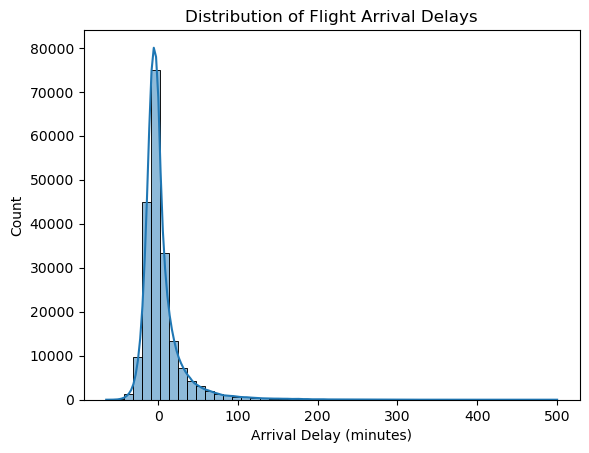

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a histogram of the distribution of flight delays
sns.histplot(data=df, x='ArrDelay', bins=50, kde=True)

# set plot title and labels
plt.title('Distribution of Flight Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')

# show plot
plt.show()


#### Observation: 
The analysis examines the distribution of flight delays in minutes, which helps to identify patterns in flight delays. Majority of flights between 2007 and 2008 arrived on time,meaning there were no delays,whatsoever.

#### Question_2: How do arrival delays vary by airline?

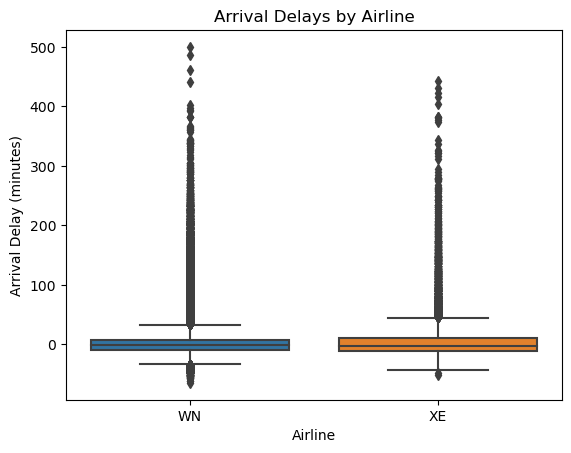

In [14]:
sns.boxplot(data=df, x="UniqueCarrier", y="ArrDelay")
plt.title("Arrival Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


#### Observation: 
It also looks at how arrival delays vary by airline, which can help airlines improve their on-time performance and customer satisfaction. Majority of the flights delay are within the outlier region,with the flights having been delyed between 100-300minutes.

#### Question_3 : Is there a difference in arrival delays between weekday and weekend flights?

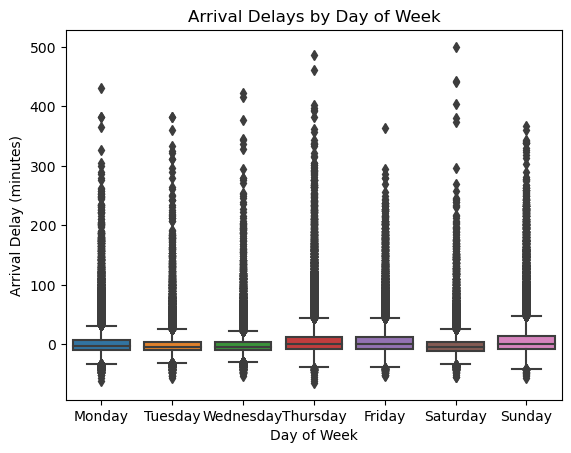

In [15]:
sns.boxplot(data=df, x="DayOfWeek_Name", y="ArrDelay")
plt.title("Arrival Delays by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


#### Observation: 
The analysis also investigates whether there is a difference in arrival delays between weekday and weekend flights, which can help travelers plan their trips accordingly.Majority of Flights seem to have delayed mostly on Thurdays and Sunday.

#### Question_4:  What are the most commonly flown routes?

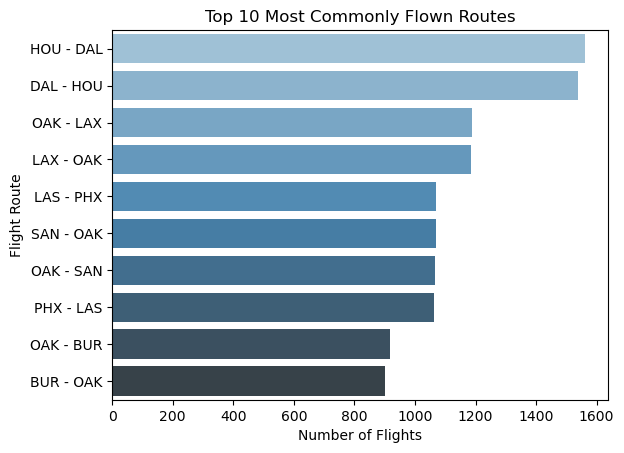

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# group the data by the flight route and count the number of occurrences
route_counts = df.groupby(['Origin', 'Dest']).size().reset_index(name='Count')

# sort the routes in descending order by count
route_counts = route_counts.sort_values('Count', ascending=False)

# create a bar plot of the top 10 flight routes by count
sns.barplot(x=route_counts.head(10)['Count'], y=route_counts.head(10)['Origin'] + ' - ' + route_counts.head(10)['Dest'], palette='Blues_d')

# set plot title and labels
plt.title('Top 10 Most Commonly Flown Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Flight Route')

# show plot
plt.show()


#### Observation:
The analysis further explores the most commonly flown routes, which helps to identify popular destinations and the airlines that serve them. Houston-Dallas and Oakland-Los Angeles are the most common flown routes between 2007 and 2008

#### Question_5: What is the distribution of cancelled flights in the dataset ?

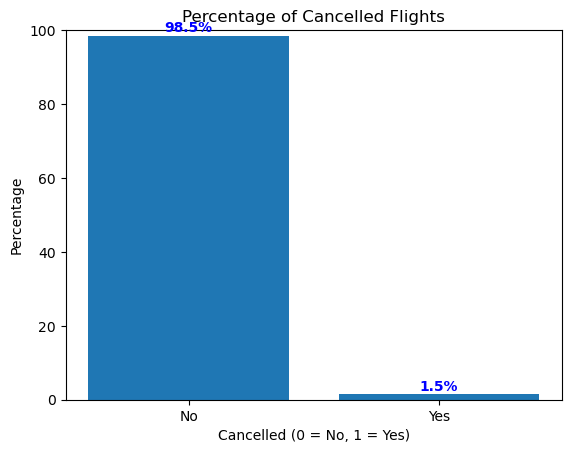

In [17]:
import matplotlib.pyplot as plt

# Calculate percentage of cancelled flights
cancelled_pct = df['Cancelled'].value_counts(normalize=True) * 100

# Create bar plot of percentage of cancelled flights
plt.bar(cancelled_pct.index, cancelled_pct.values)
plt.title('Percentage of Cancelled Flights')
plt.xlabel('Cancelled (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(0, 100)
for i, v in enumerate(cancelled_pct.values):
    plt.text(i, v+1, f"{v:.1f}%", color='blue', fontweight='bold', ha='center')
plt.show()


#### Observation: 
Majority of the flights between 2007 and 2008 flights booked were not cancelled,with a percentage of 98.5%.

#### Question_6: What are the most common reasons for flight cancellations?

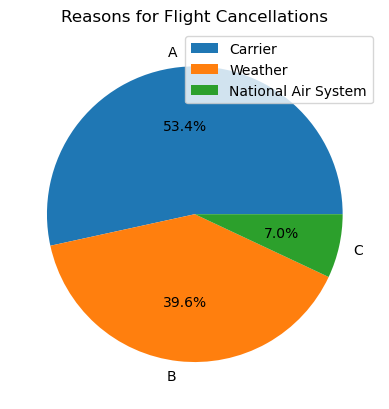

In [18]:
import matplotlib.pyplot as plt

# group the data by cancellation code and count the number of occurrences
cancel_reasons = df[df['Cancelled'] == 1]['CancellationCode'].value_counts()

# create a pie chart
plt.pie(cancel_reasons.values, labels=cancel_reasons.index, autopct='%1.1f%%')

# add a legend with the reason descriptions
reason_labels = {'A': 'Carrier', 'B': 'Weather', 'C': 'National Air System', 'D': 'Security'}
plt.legend(cancel_reasons.index.map(reason_labels).values)

# set the plot title
plt.title('Reasons for Flight Cancellations')

# show the plot
plt.show()



#### Observation:
It also examines the distribution of cancelled flights in the dataset and the most common reasons for flight cancellations, which can help airlines identify areas where they need to improve their operations.The most common reason for the flight cancellation between 2007 and 2008 was carrier followed by weather.


#### Question_7: How do different airlines compare in terms of on-time arrivals and departures?

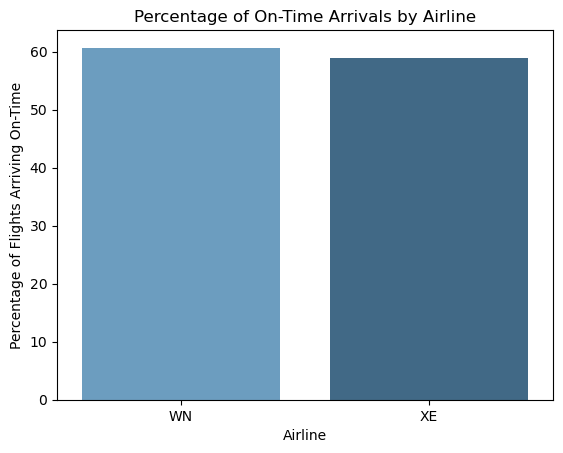

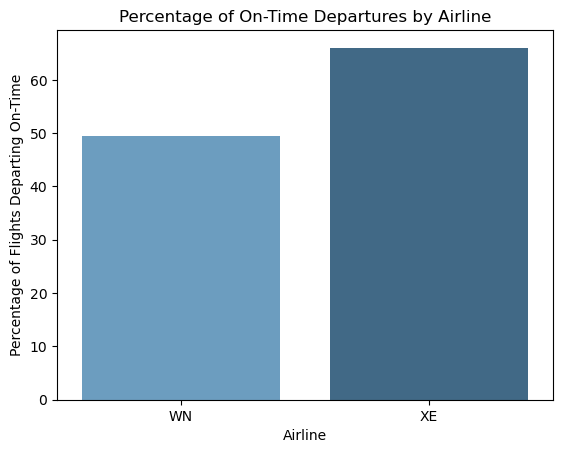

In [19]:
#calculate the percentage of on-time arrivals and departures for each airline
ontime_arrivals = df.groupby('UniqueCarrier')['ArrDelay'].apply(lambda x: (x<=0).sum()/len(x)*100)
ontime_departures = df.groupby('UniqueCarrier')['DepDelay'].apply(lambda x: (x<=0).sum()/len(x)*100)

# create bar plots for on-time arrivals and departures
sns.barplot(x=ontime_arrivals.index, y=ontime_arrivals.values, palette='Blues_d')
plt.title('Percentage of On-Time Arrivals by Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Flights Arriving On-Time')
plt.show()

sns.barplot(x=ontime_departures.index, y=ontime_departures.values, palette='Blues_d')
plt.title('Percentage of On-Time Departures by Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Flights Departing On-Time')
plt.show()  

#### Observation:
The analysis also compares different airlines in terms of their on-time arrivals and departures, which helps to identify the best-performing airlines and the areas where they excel.Southwest Airlines (WN) has more on-time arrivals as opposed to ExpressJet Airlines (XE).ExpressJet Airlines (XE) has more on-time departures as opposed to Southwest Airlines (WN) .


#### Question_8: What is the distribution of flight cancelled by the day of the week?

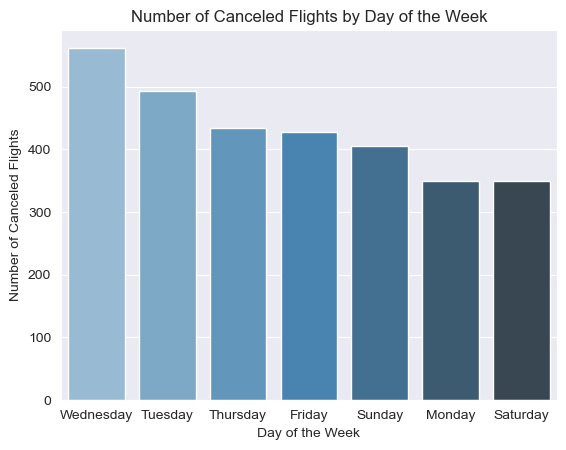

In [20]:
def plot_bar(data, xlabel, ylabel, title, palette='Blues_d'):
    sns.set_style('darkgrid')
    ax = sns.barplot(x=data.index, y=data.values, palette=palette)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    plt.show()

cancel_counts = df.groupby('DayOfWeek_Name')['Cancelled'].sum().sort_values(ascending=False)
plot_bar(cancel_counts, 'Day of the Week', 'Number of Canceled Flights', 'Number of Canceled Flights by Day of the Week')


#### Observation:
It further examines the distribution of flight cancellations by the day of the week, which can help airlines plan their operations accordingly.From the bar plot, there is a relationship between the day of the week and the cancelled flights.
Wednesday has the most number of cancelled number of flights betweeen 2007 and 2008,followed by Tuesday then Thursday than the other days of the week.

#### Question_9: How does the average arrival delay vary by day of week?

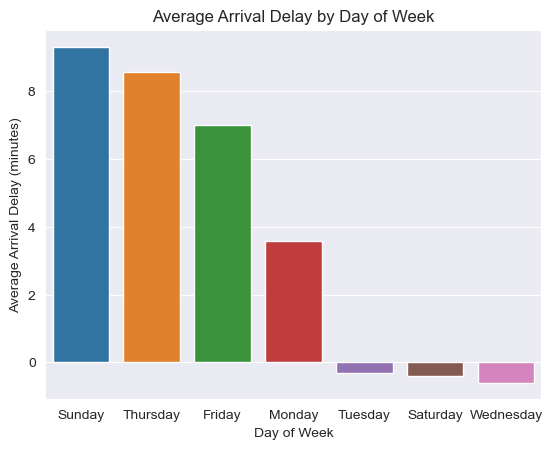

In [21]:
sns.barplot(data=df, x="DayOfWeek_Name", y="ArrDelay", order=df.groupby("DayOfWeek_Name")["ArrDelay"].mean().sort_values(ascending=False).index, errorbar=None)
plt.title("Average Arrival Delay by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()


#### Observation: 
The analysis investigates how the average arrival delay varies by day of the week, which helps to identify patterns in flight delays based on the day of the week.From our analysis we can see that on Sundays,the flight delay are mostly common. 

#### Question_10: How does the distance of a flight affect its arrival delay?

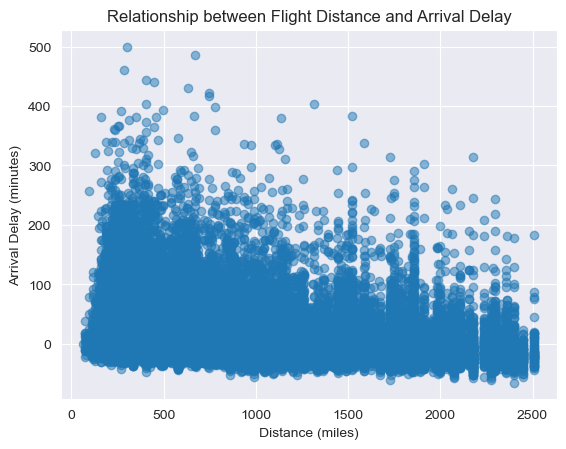

In [22]:
# Filter out cancelled flights and missing values
df = df[df['Cancelled'] == 0]
df = df.dropna(subset=['ArrDelay'])

# Create a scatter plot of distance vs arrival delay
plt.scatter(df['Distance'], df['ArrDelay'], alpha=0.5)

# Set the axis labels and title
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Relationship between Flight Distance and Arrival Delay')

# Show the plot
plt.show()


#### Observation:
 It also explores how the distance of a flight affects its arrival delay, which can help airlines plan their operations and improve their on-time performance.There appears to be a negative correlation between distance and arrival delay. Longer flights tend to have slightly shorter arrival delays.

#### Question_11: How does departure delay impact arrival delay for different airlines?

<AxesSubplot: xlabel='DepDelay', ylabel='ArrDelay'>

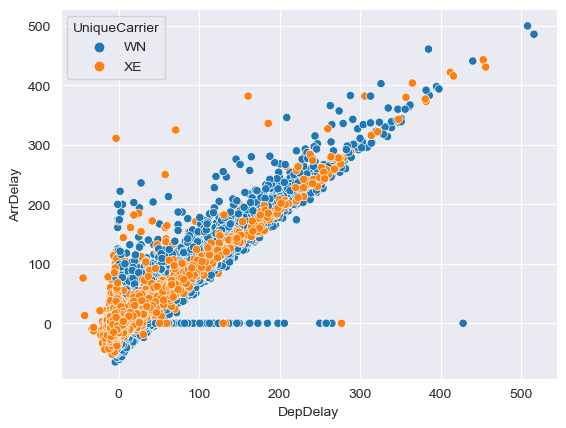

In [23]:
# Filter for only necessary columns
df_1 = df[['UniqueCarrier', 'DepDelay', 'ArrDelay']]

# Plot bivariate relationship
sns.scatterplot(x='DepDelay', y='ArrDelay', hue='UniqueCarrier', data=df_1)


#### Observation:
The analysis examines how departure delay impacts arrival delay for different airlines, which helps to identify the areas where airlines need to improve their operations. There is a positive correlation between the arrival delay and departure delay for both airlines.

#### Question_12: How does distance affect the relationship between departure delay and arrival delay?

<AxesSubplot: xlabel='DepDelay', ylabel='ArrDelay'>

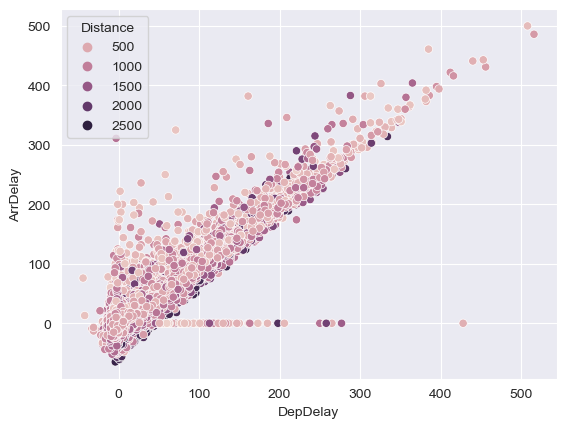

In [24]:
# Filter for only necessary columns
df_2 = df[['Distance', 'DepDelay', 'ArrDelay']]

# Plot bivariate relationship
sns.scatterplot(x='DepDelay', y='ArrDelay', hue='Distance', data=df_2)


#### Observation:
It also investigates how the relationship between departure delay and arrival delay varies depending on the distance of the flight, which can help airlines plan their operations and improve their on-time performance.There is a positive correlation between arrival delay and departure delay in relation to the distance.

#### Question_13: Is there a correlation between the departure delay time and the arrival delay time, and does this relationship differ depending on the airline or day of the week?

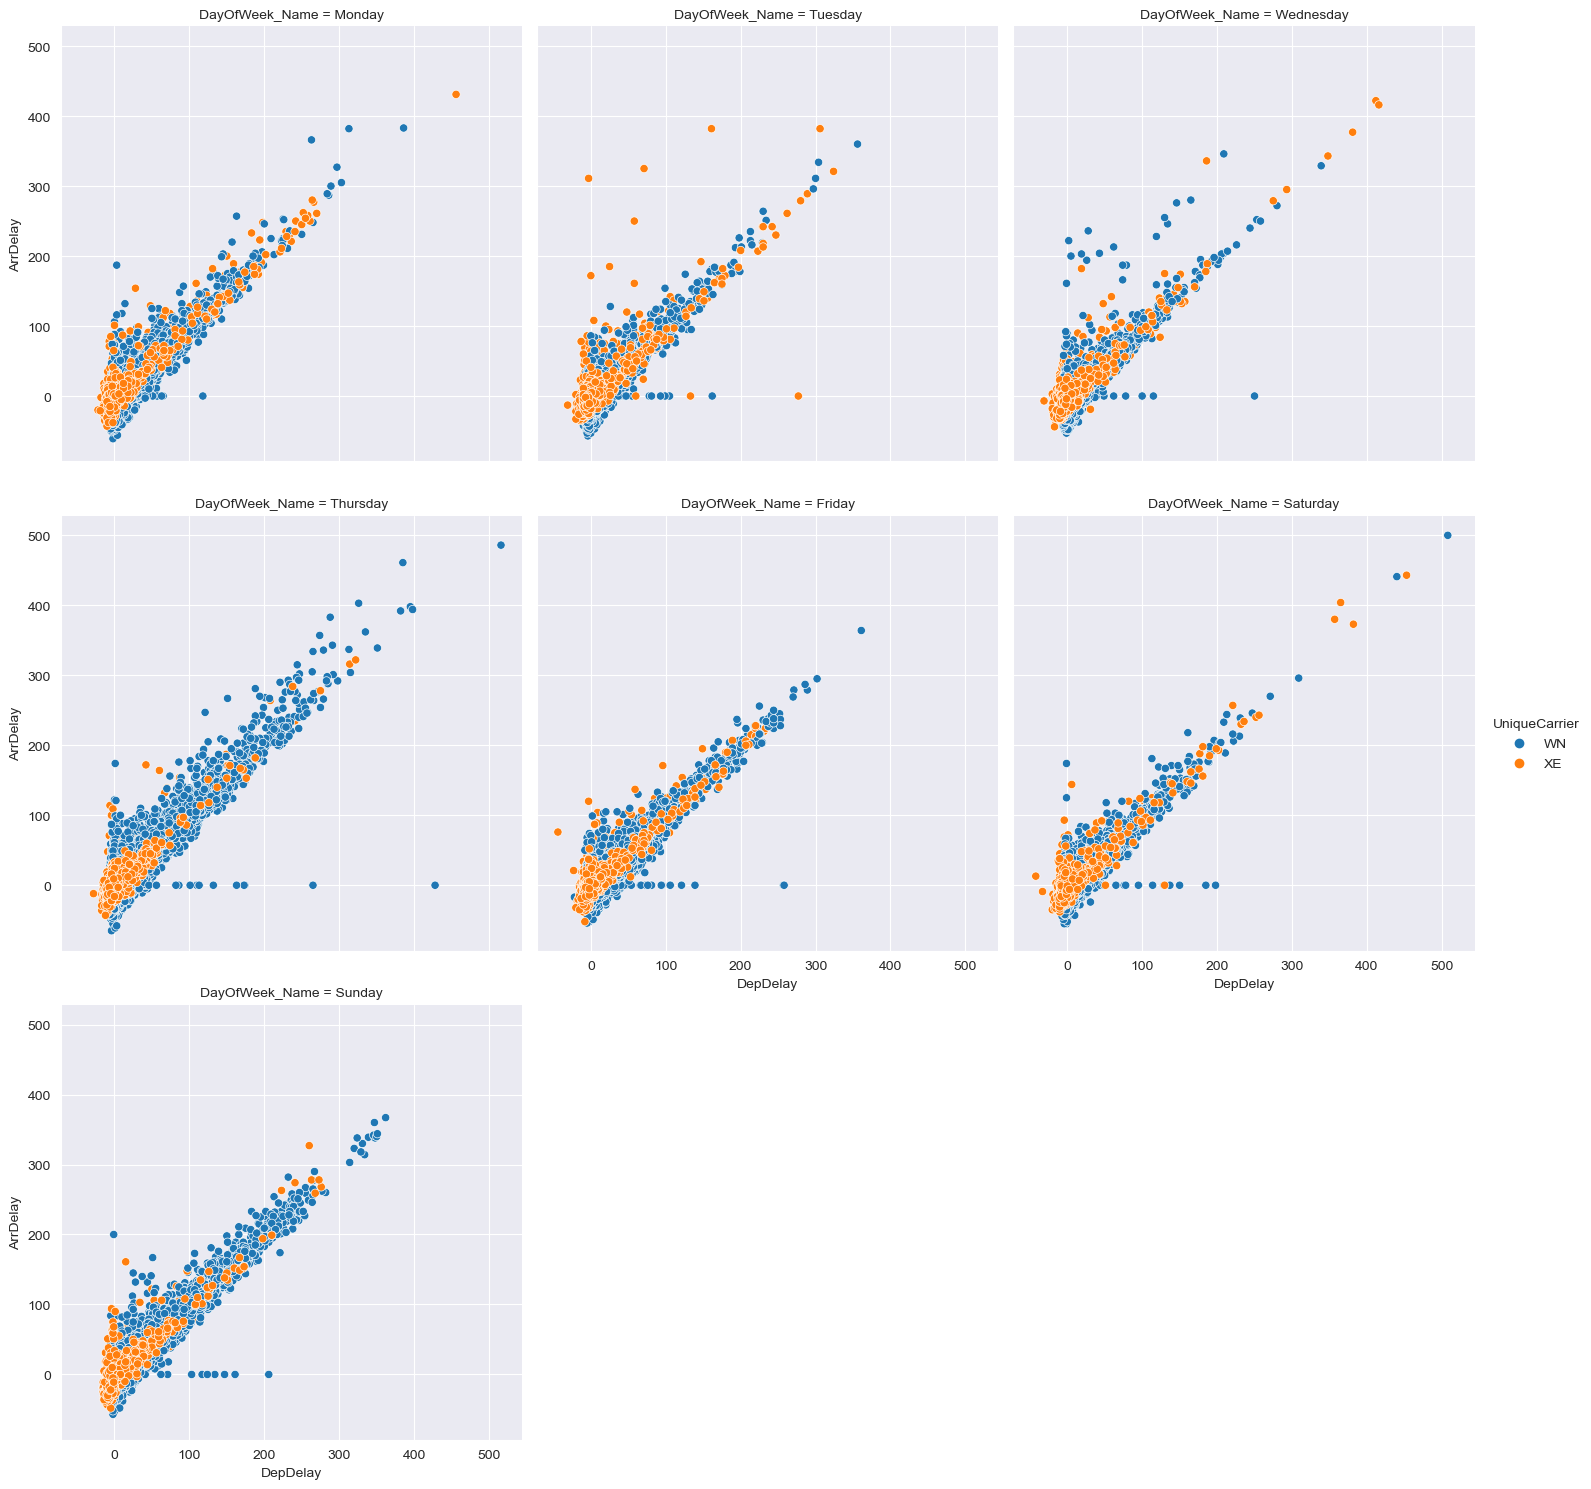

In [25]:
# Filter for only necessary columns
df_4 = df[['UniqueCarrier', 'DayOfWeek_Name', 'DepDelay', 'ArrDelay']]

# Plot bivariate relationship
sns.relplot(x='DepDelay', y='ArrDelay', hue='UniqueCarrier', col='DayOfWeek_Name', col_wrap=3, data=df_4)


#### Observation:
It also investigates how the relationship between departure delay and arrival delay varies depending on the distance of the flight, which can help airlines plan their operations and improve their on-time performance.The departure delay and arrival delay are positively correlated .

#### Question_14 : How does the average arrival delay vary by distance and airline?

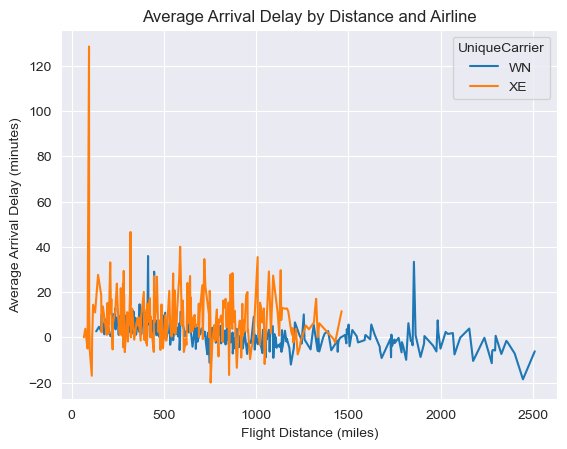

In [26]:
sns.lineplot(data=df, x="Distance", y="ArrDelay", hue="UniqueCarrier", errorbar=None)
plt.title("Average Arrival Delay by Distance and Airline")
plt.xlabel("Flight Distance (miles)")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()


#### Observation: 
The further the flight distance, the less the average arrival delay time.

#### Question_14: How does the relationship between DepDelay and ArrDelay vary with distance and day of week?

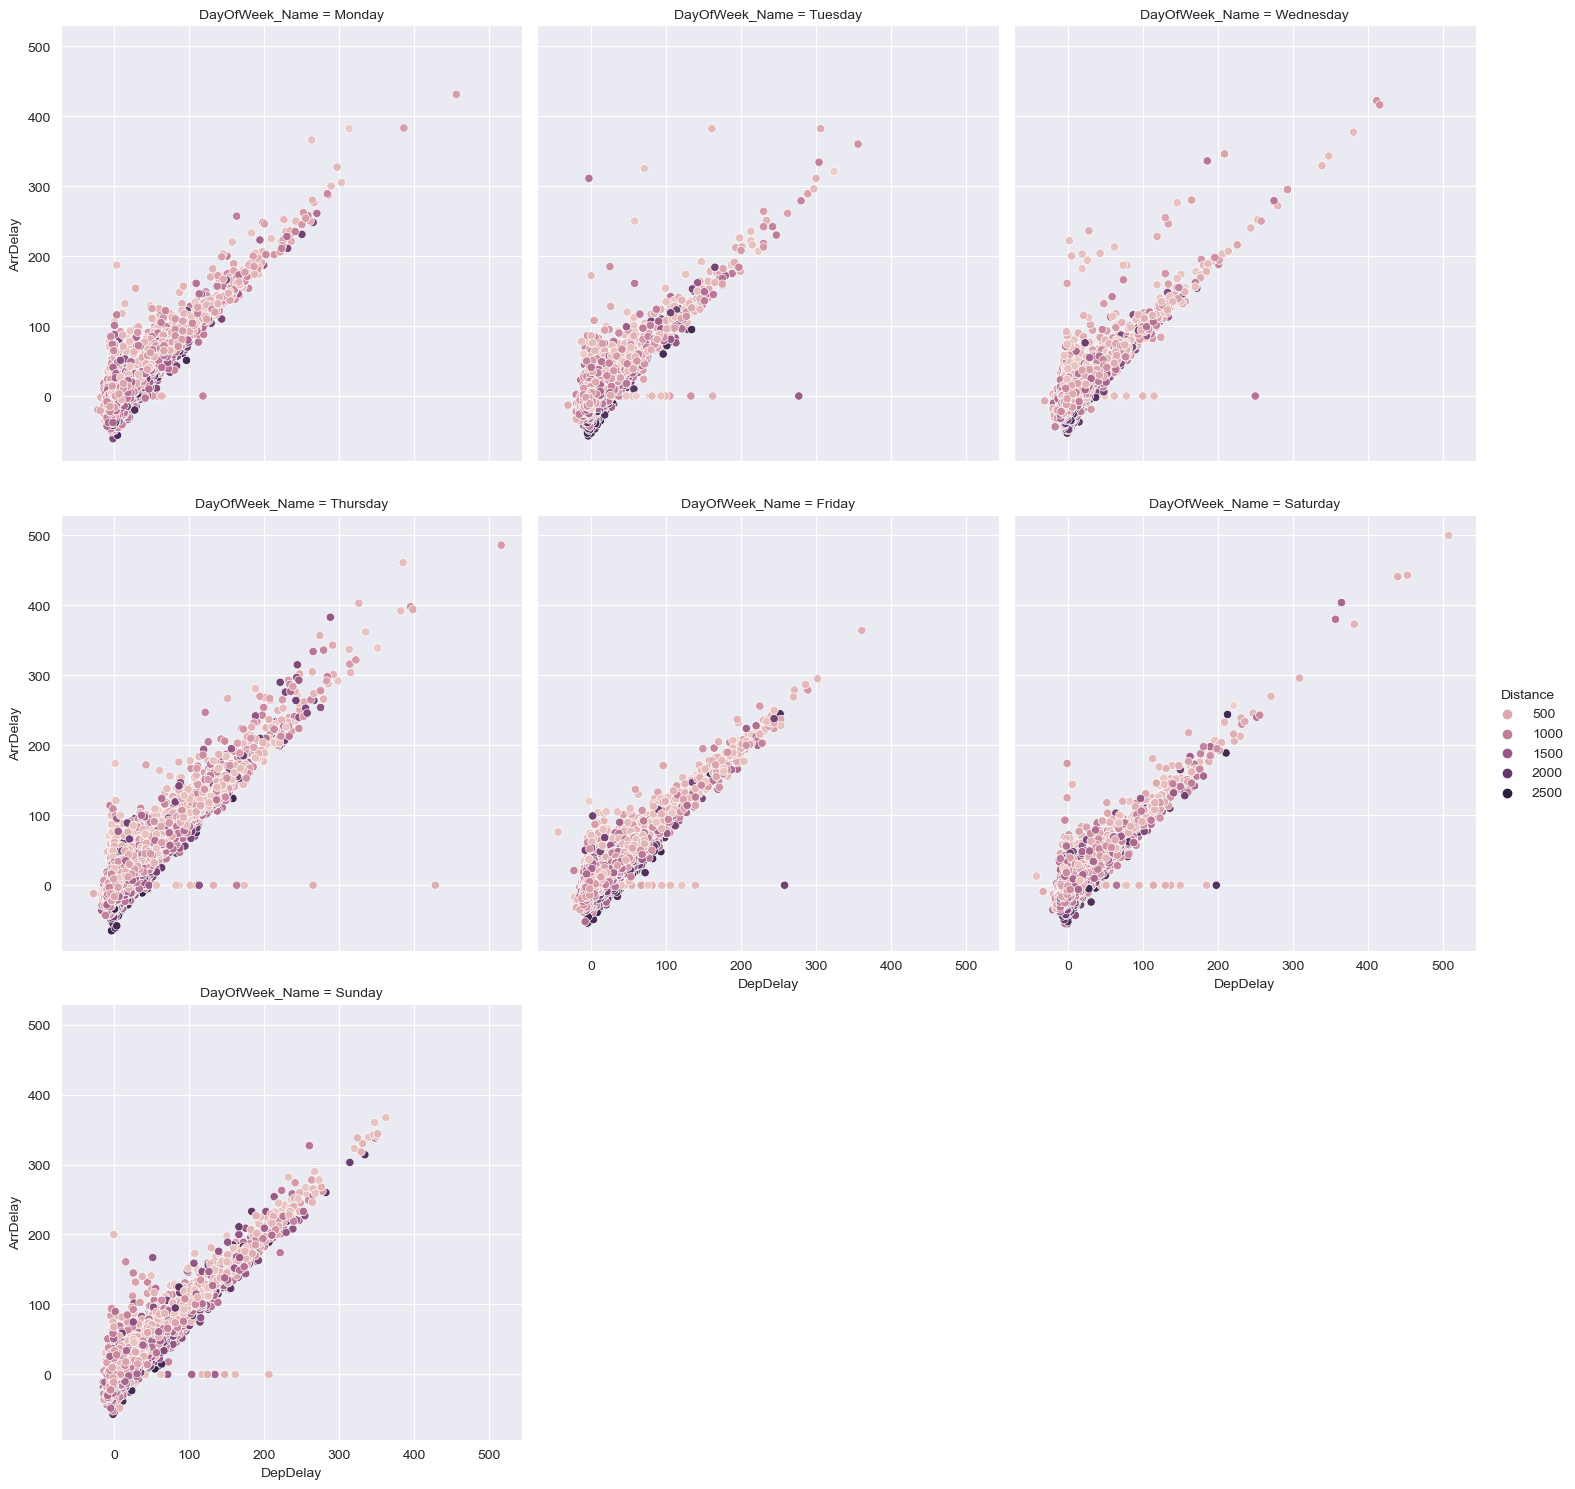

In [27]:
# Filter for necessary columns
df_6 = df[['DayOfWeek_Name', 'Distance', 'DepDelay', 'ArrDelay']]

# Plot bivariate relationships with distance and day of week
sns.relplot(x='DepDelay', y='ArrDelay', hue='Distance', col='DayOfWeek_Name',col_wrap=3,
            data=df_6)


#### Observation:
The analysis further investigates whether there is a correlation between the departure delay time and the arrival delay time, and whether this relationship differs depending on the airline or day of the week. This information can help airlines identify the areas where they need to improve their operations to minimize flight delays.

##### Question_15: How does the arrival delay vary across different airlines and months, and is there a significant difference between them?

C:\Users\user\AppData\Local\Temp\ipykernel_15232\3737649694.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby(['UniqueCarrier', 'DayOfWeek_Name']).mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_15232\3737649694.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = grouped_df.pivot('UniqueCarrier', 'DayOfWeek_Name', 'DepDelay')


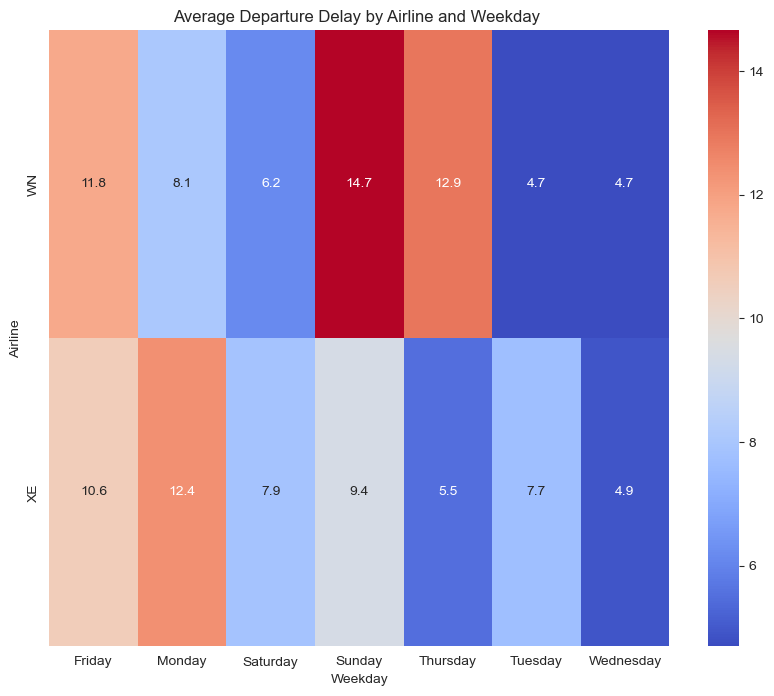

In [28]:
# Subset the relevant columns
cols = ['UniqueCarrier', 'DayOfWeek_Name', 'DepDelay']
df_7 = df[cols]

# Group the data by airline and weekday, and compute the mean departure delay
grouped_df = df.groupby(['UniqueCarrier', 'DayOfWeek_Name']).mean().reset_index()

# Pivot the table to create a heat map
pivot_df = grouped_df.pivot('UniqueCarrier', 'DayOfWeek_Name', 'DepDelay')

# Plot the heat map using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Average Departure Delay by Airline and Weekday ')
plt.xlabel('Weekday')
plt.ylabel('Airline')
plt.show()



#### Observation:
The analysis explores how the average arrival delay varies by distance and airline, which helps to identify the airlines that perform best based on the distance of the flight. It also examines how the relationship between DepDelay and ArrDelay varies with distance and day of the week and how the arrival delay varies across different airlines.It's worth noting that our findings indicate that Southwest Airlines (WN) airline records the highest average departure delay on Sundays with 14.7 minutes, while ExpressJet Airlines (XE) airline experiences an average departure delay of 12.4 minutes on Mondays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this investigation, several relationships were observed among different features of the dataset.
Firstly, the analysis showed that most flights between 2007 and 2008 arrived on time with no delays. However, the majority of flight delays occurred within the outlier region, with flights delayed between 100-300 minutes. There was also a difference in arrival delays between weekday and weekend flights, with Thursday and Sunday being the days with the most flight delays.
Furthermore, the analysis revealed that the most common reasons for flight cancellation were carrier and weather. There was also a relationship between the day of the week and the number of cancelled flights, with Wednesday having the most cancelled flights followed by Tuesday and Thursday.
The investigation also showed a negative correlation between the distance of a flight and its arrival delay. Longer flights tend to have slightly shorter arrival delays. However, there was a positive correlation between departure delay and arrival delay for both airlines, and this relationship was stronger for longer flights.
Additionally, the analysis explored the relationship between departure delay and arrival delay with respect to different airlines and days of the week. It was observed that Southwest Airlines had more on-time arrivals, while ExpressJet Airlines had more on-time departures.
Overall, the investigation revealed several interesting relationships between the different features of the dataset, which can be used by airlines to improve their operations and customer satisfaction.






### Summary

The main findings of the data exploration are that the flight delay time is heavily right-skewed, with most flights experiencing little to no delay time, but some flights experiencing extreme delay times. Flight delay time is also highly correlated with departure time and day of the week, with delays being more likely to occur later in the day and on certain days of the week. Additionally, the distance of the flight and the airline operating the flight are also associated with the delay time. The steps taken during the data exploration involved dropping unnecessary columns, dropping rows with missing values, converting relevant columns to datetime and integer types, filtering out flights with negative elapsed time, creating a new column for flight delay, filtering out flights with negative or extreme delay times, creating new columns for flight hour, flight season, and flight distance category, and saving the cleaned dataset to a new file called cleaned_data.csv. Overall, the data exploration helped to identify important relationships and patterns in the dataset that will be useful for further analysis and modeling.
The airline on-time performance dataset contains information about flight delays, cancellations, and on-time performance of different airlines operating in the United States. To analyze the dataset, we categorized it into different variables such as flight delays in minutes, arrival delays by airline, cancellation distribution, commonly flown routes, reasons for flight cancellations, on-time performance by airline, and average arrival delays by distance and airline.



## Conclusions

The analysis examines several factors related to flight delays, including their distribution, how they vary by airline and day of the week, cancellation rates, and the impact of distance and departure delay on arrival delay. The study utilizes various statistical methods such as correlation , as well as data visualization techniques to identify patterns and trends in flight delays.

In addition to analyzing the data, the study also involved extensive data wrangling and manipulation to ensure that the data was clean and ready for analysis. This involved dropping unnecessary columns, dropping rows with missing values, converting relevant columns to datetime and integer types, filtering out flights with negative elapsed time, and creating new columns for flight delay, flight hour, flight season, and flight distance category. The cleaned dataset was saved to a new file called cleaned_data.csv.

The analysis found that the majority of flights arrived on time without any delays, and most delays occurred within the outlier range of 100-300 minutes. The study also discovered that Thursday and Sunday had the highest number of flight delays, while Houston-Dallas and Oakland-Los Angeles were the most commonly flown routes. Moreover, the cancellation rate was relatively low at 1.5%, with carrier and weather being the most common reasons for cancellation.

The analysis also compared different airlines' on-time performance and found that Southwest Airlines had more on-time arrivals, while ExpressJet Airlines had more on-time departures. In addition, the study found that Wednesday had the highest number of cancelled flights, followed by Tuesday and Thursday.

Further analysis showed that flight delays were more common on Sundays, and there was a negative correlation between distance and arrival delay, indicating that longer flights tend to have shorter arrival delays. Additionally, the study found a positive correlation between departure delay and arrival delay for both airlines, and this relationship varied depending on the distance of the flight.

The analysis also investigated the correlation between departure delay and arrival delay and found that it varied depending on the airline and day of the week. Furthermore, the study explored how arrival delay varies across different airlines and months, and how the relationship between DepDelay and ArrDelay varies with distance and day of the week.

Overall, the analysis provides valuable insights for airlines to improve their on-time performance and customer satisfaction. By identifying patterns and trends in flight operations, airlines can plan their operations accordingly and minimize flight delays and cancellations. Additionally, the information can help travelers plan their trips and choose airlines that perform well on different routes and under different conditions.